# 大作业-1-数据清洗


## 导入库

In [27]:
import numpy as np
import pandas as pd 
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt

## 数据导入

In [28]:
df0 = pd.read_csv('abalone.csv')
df0.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


根据要求，计算年龄，不考虑性别影响

In [29]:
df = df0.copy() 
df['age'] = df0['Rings']+3
df.drop('Rings', axis = 1, inplace = True)
df.drop('Sex', axis = 1, inplace = True)
df.head(3)


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,18
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,10
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,12


检查有无缺省值

In [30]:
df.isnull().sum()

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

## 数据可视化

In [31]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

绘制箱线图观察数据分布及异常值

<Axes: ylabel='age'>

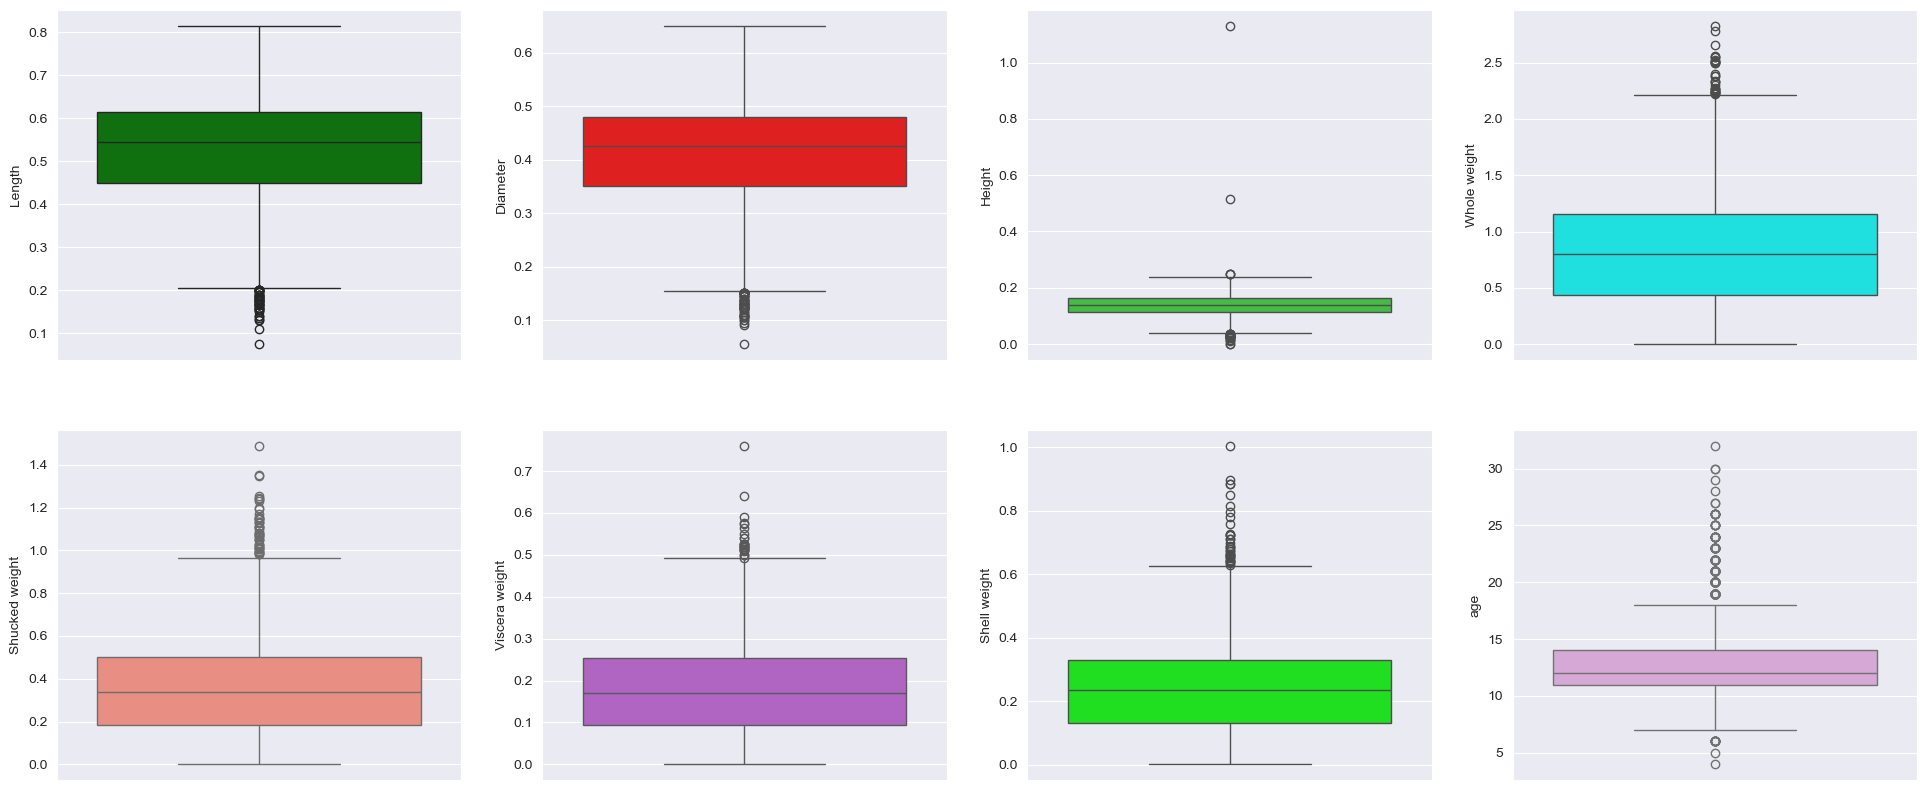

In [32]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows= 2, ncols = 4, figsize = (24,10))
sns.boxplot(ax = ax1, y = 'Length', data = df, color = 'green')
sns.boxplot(ax = ax2, y = 'Diameter', data = df, color = 'red')
sns.boxplot(ax = ax3, y = 'Height', data = df, color = 'limegreen')
sns.boxplot(ax = ax4, y = 'Whole weight', data = df, color = 'cyan')
sns.boxplot(ax = ax5, y = 'Shucked weight', data = df, color = 'salmon')
sns.boxplot(ax = ax6, y = 'Viscera weight', data = df, color = 'mediumorchid')
sns.boxplot(ax = ax7, y = 'Shell weight', data = df, color = 'lime')
sns.boxplot(ax = ax8, y = 'age', data = df, color = 'plum')

c:\Users\hechu\anaconda3\envs\linear_reg\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\hechu\anaconda3\envs\linear_reg\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\hechu\anaconda3\envs\linear_reg\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\hechu\anaconda3\envs\linear_reg\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\hechu\anaconda3\envs\linear_reg\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\hechu\anaconda3\envs\

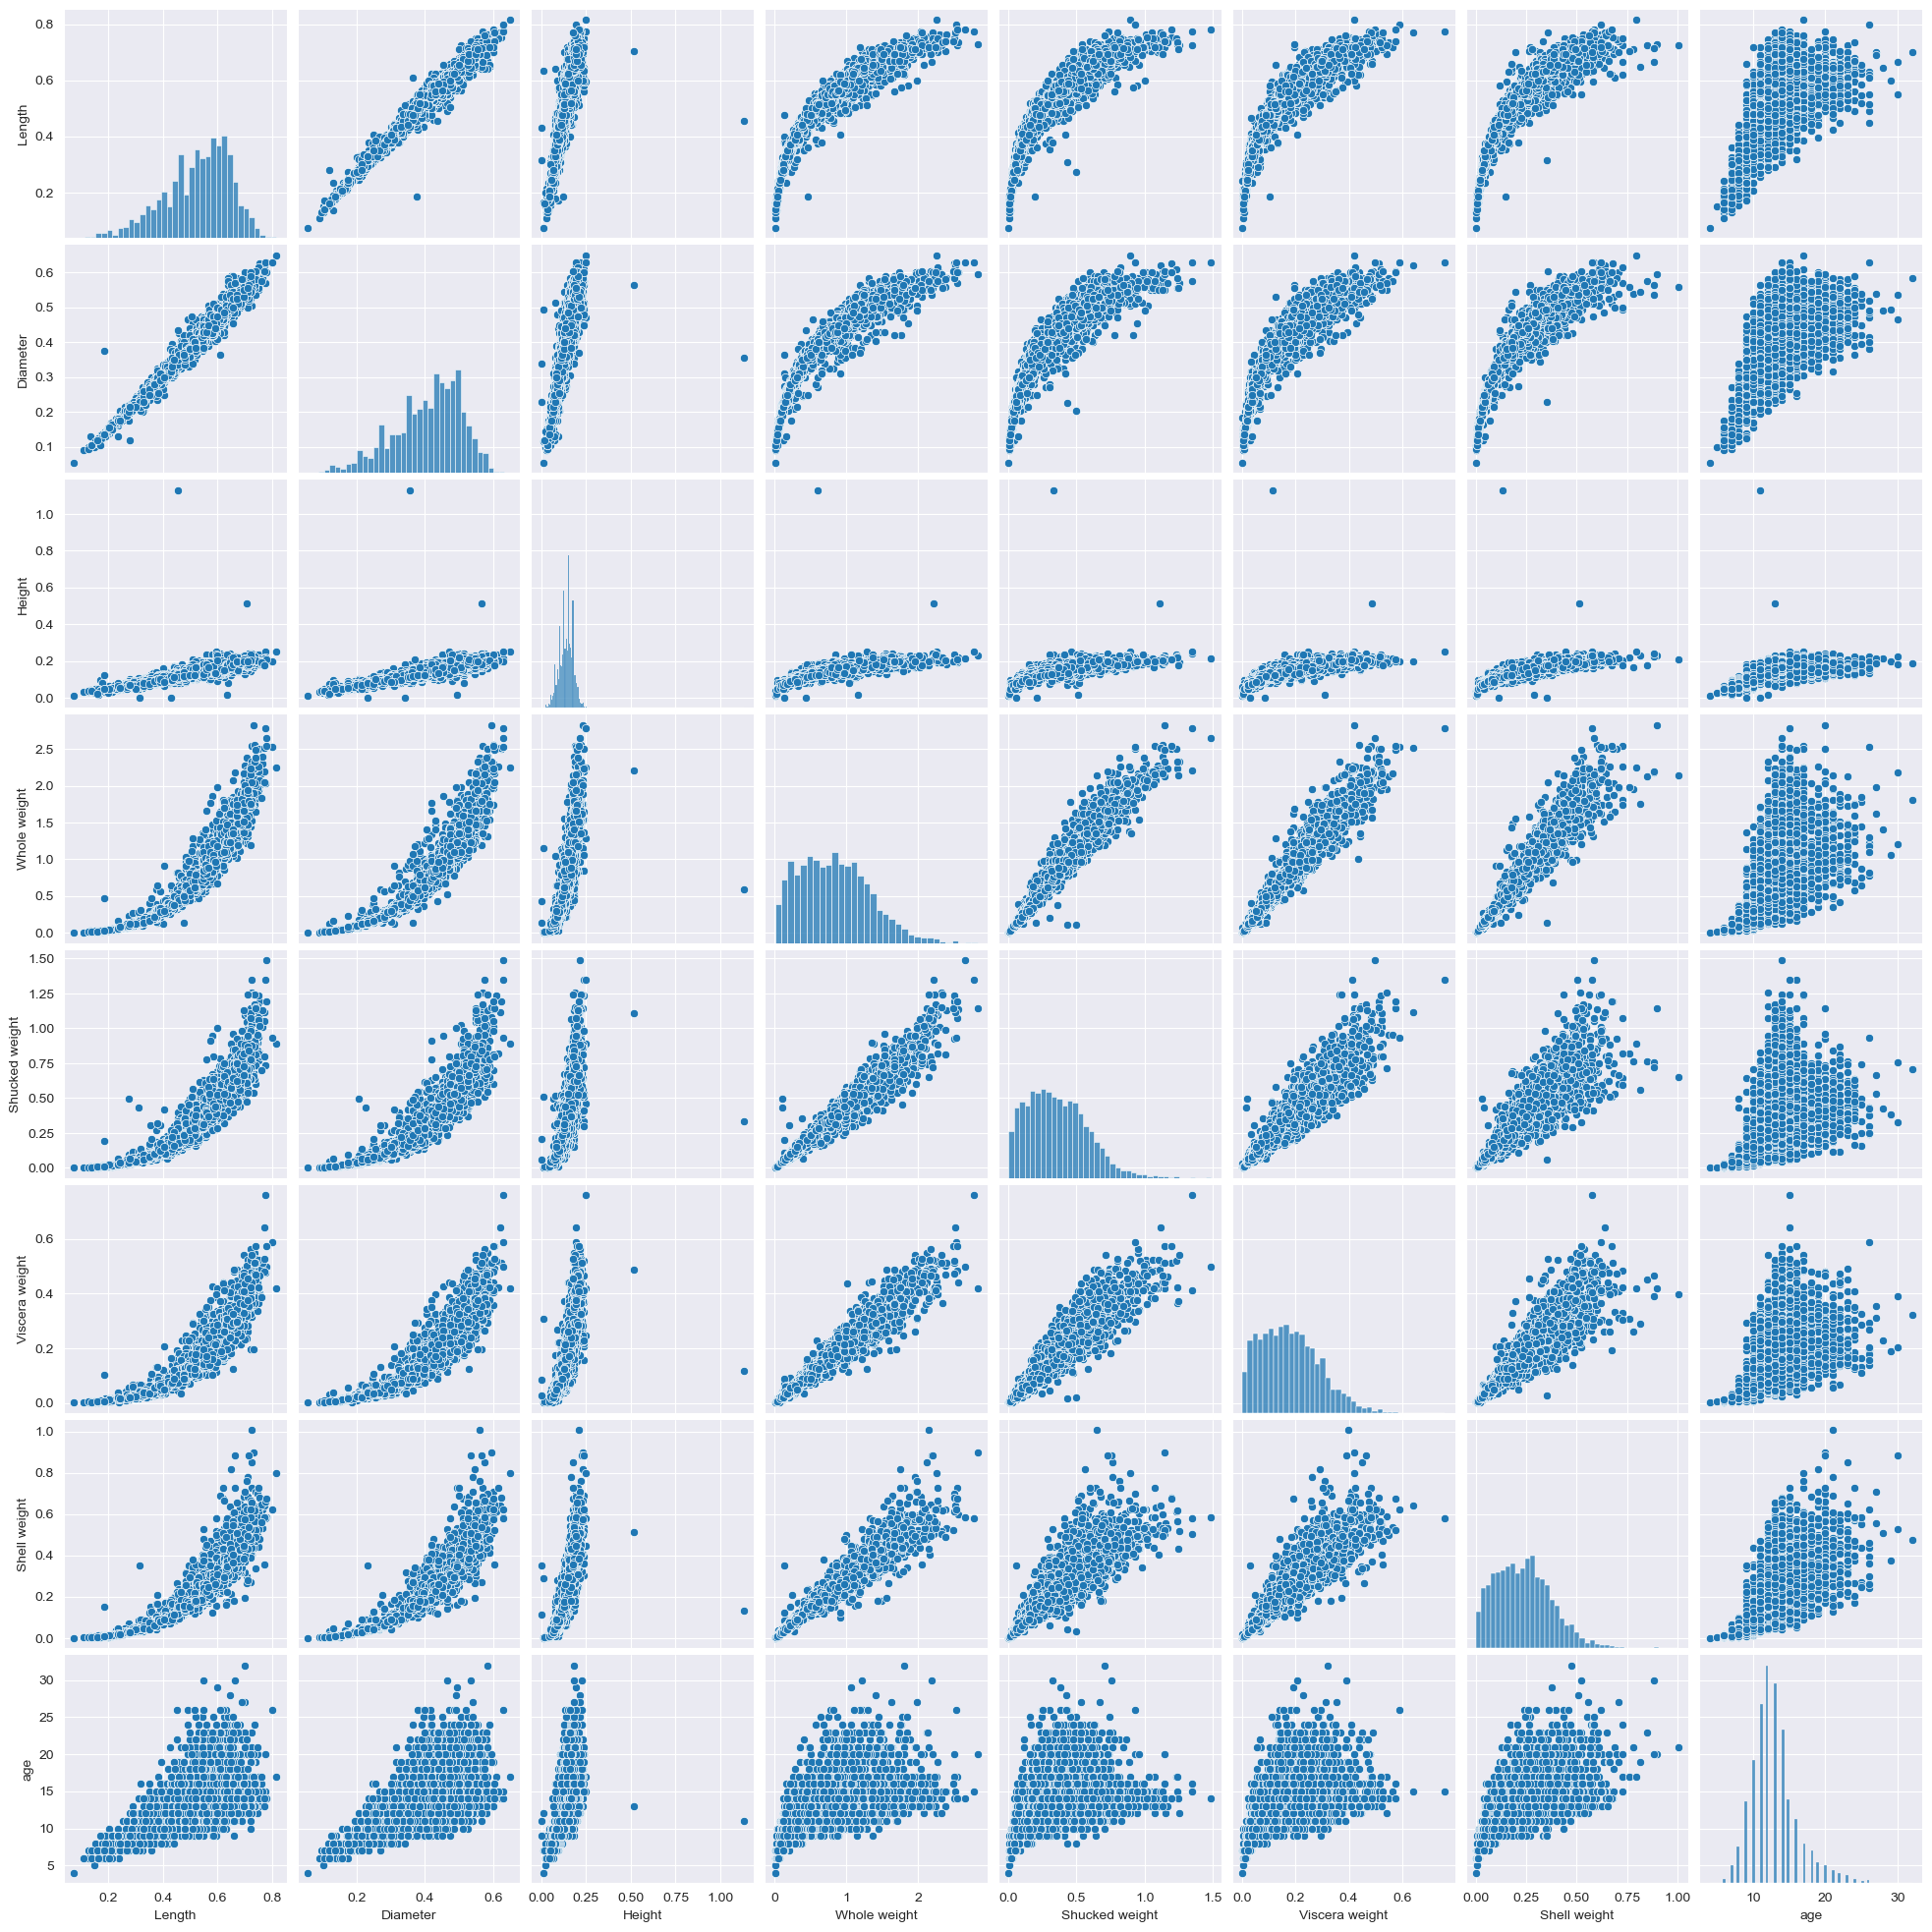

In [33]:
sns.pairplot(data = df, palette = 'Dark2')

观察结果：
    
    - 许多特征高度相关
        - “长度”与“直径”显示出线性相关
        - “长度”与“重量”特征呈二次相关
        - “总体重量”与其他重量特征呈线性相关
    - “环数”（Rings）与几乎所有二次特征呈正相关
    - “高度”特征中可能存在异常值
    
散点图分析还显示，数据主要覆盖了“环数”从3到略超过20的值，仅选择这部分数据用于模型可能需要考虑，以提高准确性。


## 处理异常值

可视化数据以帮助数据清洗

### 外壳长度Length

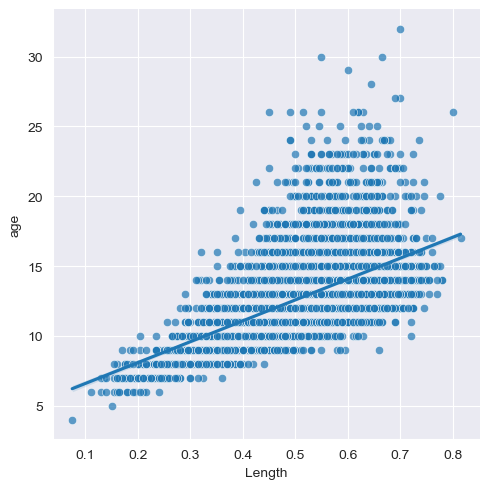

In [34]:
sns.set_style('darkgrid')
sns.lmplot(x = 'Length', y = 'age', data = df, palette = 'Set1', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidths':0.5})

清洗一些显然的离群值

In [35]:
df.drop(df[(df['Length']<0.1) & (df['age'] < 5)].index, inplace=True)
df.drop(df[(df['Length']<0.8) & (df['age'] > 25)].index, inplace=True)
df.drop(df[(df['Length']>=0.8) & (df['age']< 25)].index, inplace=True)

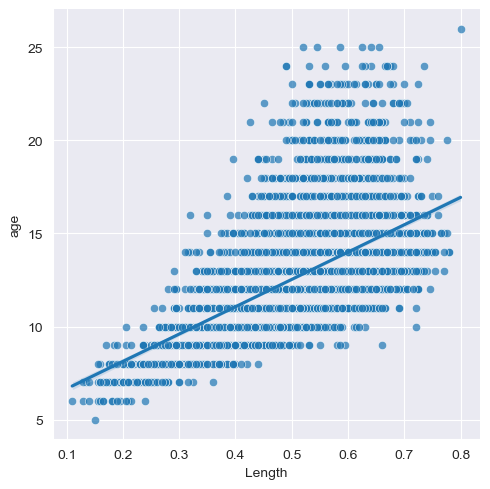

In [36]:
sns.set_style('darkgrid')
sns.lmplot(x = 'Length', y = 'age', data = df, palette = 'Set1', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidths':0.5})

### 外壳直径Diameter

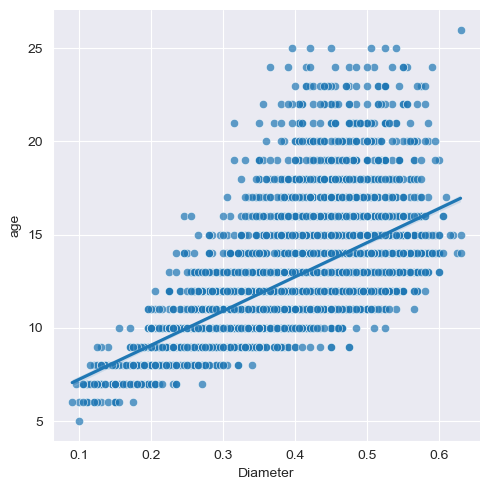

In [37]:
sns.lmplot(x = 'Diameter', y = 'age', data = df, palette = 'Dark2', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidths':0.5})

In [38]:
df.drop(df[(df['Diameter']<0.1) & (df['age'] < 5)].index, inplace=True)
df.drop(df[(df['Diameter']<0.6) & (df['age'] > 25)].index, inplace=True)
df.drop(df[(df['Diameter']>=0.6) & (df['age']< 25)].index, inplace=True)

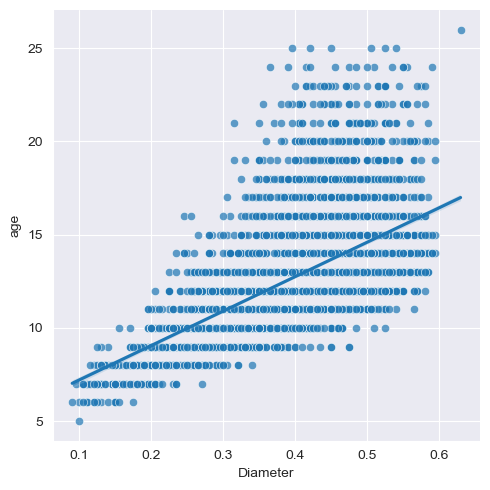

In [39]:
sns.lmplot(x = 'Diameter', y = 'age', data = df, palette = 'Dark2', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidths':0.5})

### 外壳厚度Height

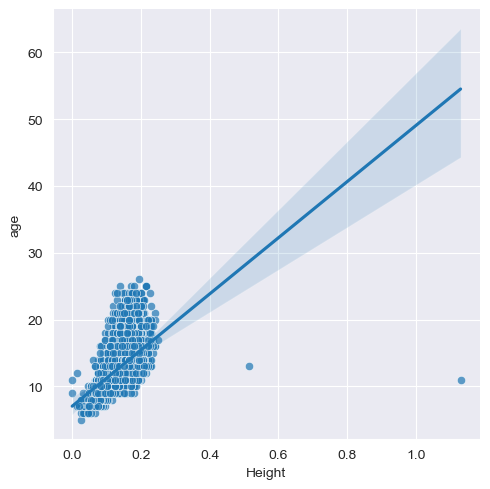

In [40]:
sns.lmplot(x = 'Height', y = 'age', data = df, palette = 'Dark2', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidths':0.5})

In [41]:
df.drop(df[(df['Height']>0.4) & (df['age'] < 15)].index, inplace=True)
df.drop(df[(df['Height']<0.4) & (df['age'] > 25)].index, inplace=True)

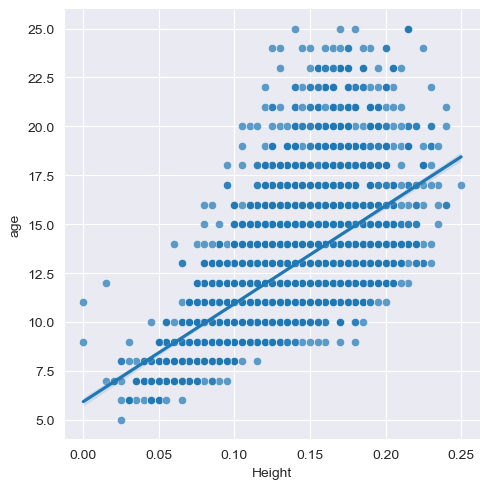

In [42]:
sns.lmplot(x = 'Height', y = 'age', data = df, palette = 'Dark2', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidths':0.5})

### 全鲍重量Whole weight

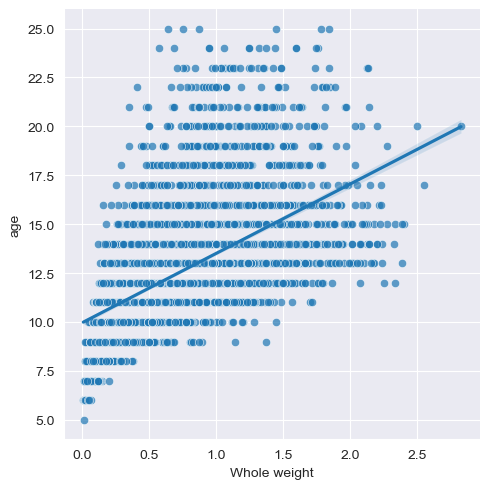

In [43]:
sns.lmplot(x = 'Whole weight', y = 'age', data = df, palette = 'magma', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidths':0.5})

In [44]:
df.drop(df[(df['Whole weight']>= 2.5) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['Whole weight']<2.5) & (df['age'] > 25)].index, inplace=True)

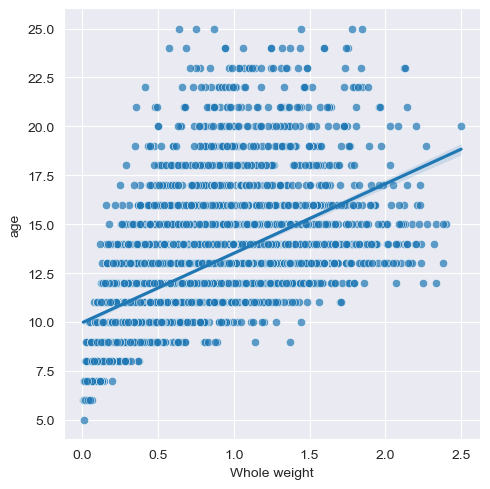

In [45]:
sns.lmplot(x = 'Whole weight', y = 'age', data = df, palette = 'magma', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidths':0.5})

### 去壳重量 Shucked weight

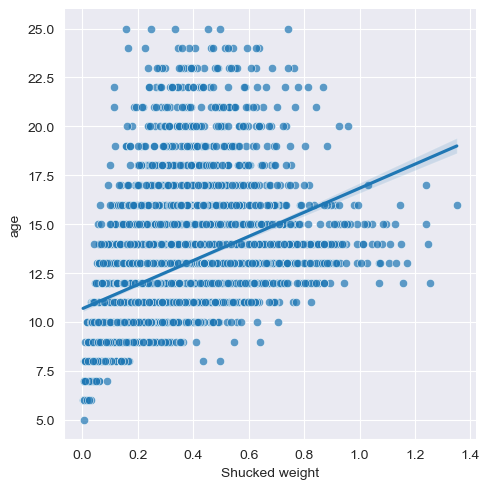

In [46]:
sns.lmplot(x = 'Shucked weight', y = 'age', data = df, palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidths':0.5})

In [47]:
df.drop(df[(df['Shucked weight']>= 1) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Shucked weight']<1) & (df['age'] > 20)].index, inplace=True)

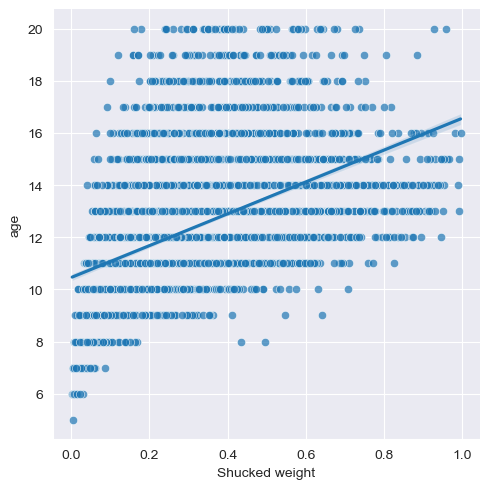

In [48]:
sns.lmplot(x = 'Shucked weight', y = 'age', data = df, palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidths':0.5})

### 肠道重量 Viscera weight

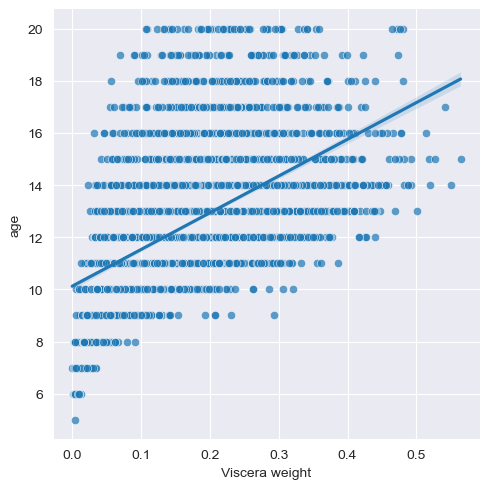

In [49]:
sns.lmplot(x = 'Viscera weight', y = 'age', data = df,  palette = 'gnuplot', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidths':0.5})

In [50]:
df.drop(df[(df['Viscera weight']> 0.5) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Viscera weight']<0.5) & (df['age'] > 25)].index, inplace=True)

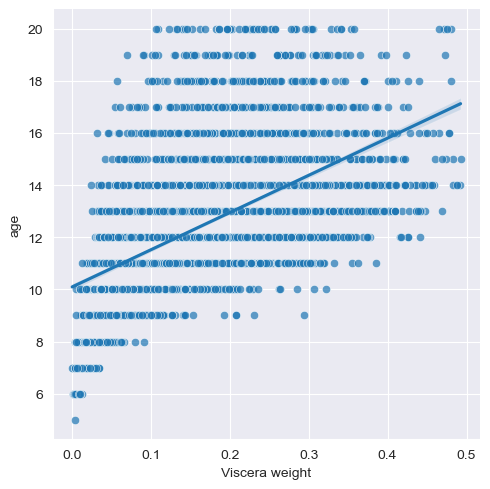

In [51]:
sns.lmplot(x = 'Viscera weight', y = 'age', data = df,  palette = 'gnuplot', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidths':0.5})

### 外壳重量 Shell weight

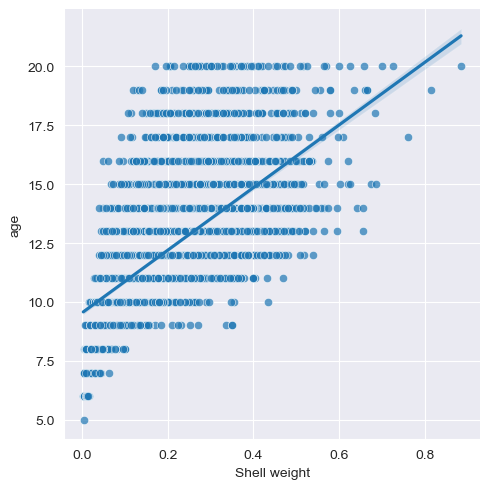

In [52]:
sns.lmplot(x = 'Shell weight', y = 'age', data = df, palette = 'twilight_r', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidths':0.5})

In [53]:
df.drop(df[(df['Shell weight']> 0.6) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['Shell weight']<0.8) & (df['age'] > 25)].index, inplace=True)

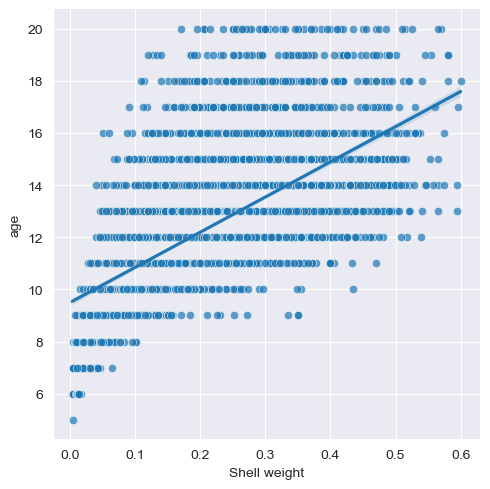

In [54]:
sns.lmplot(x = 'Shell weight', y = 'age', data = df, palette = 'twilight_r', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidths':0.5})

### 总结

In [55]:
print('去掉的异常值数量: ', df0.shape[0]-df.shape[0])
print('占比: ', 1 - df.shape[0] / df0.shape[0])

去掉的异常值数量:  219
占比:  0.05242997366530999


## 数据的相关性

<Axes: >

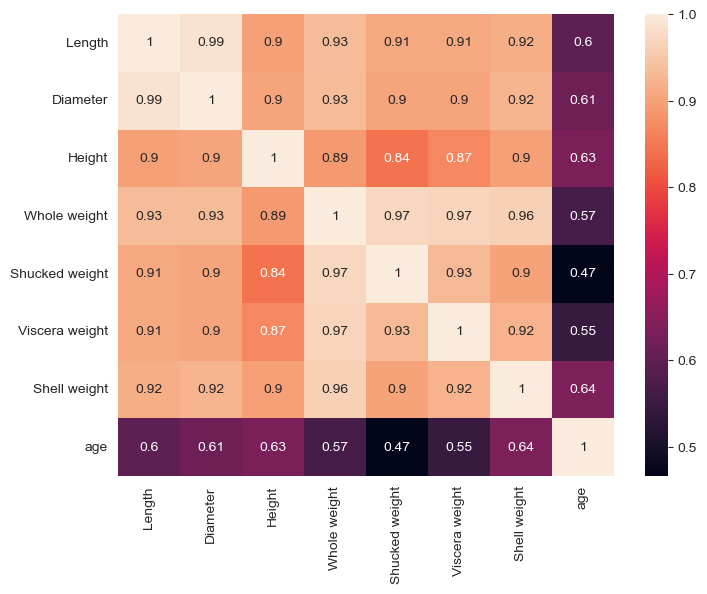

In [56]:
plt.figure(figsize = (8,6))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot = True)

热力图显示特征之间高度相关，可能存在多重共线性。

- 除了“Rings”之外，“Whole weight”几乎与所有特征呈线性相关。
- “Length”与“Diameter”呈线性相关。
- 在排除“Rings”的所有特征中，“Height”与其他特征的相关性最低。
- “Rings”特征与“Shell Weight”的相关性最高，其次是“Height”、“Length”和“Diameter”。

针对数据中高度共线性的可能解决方案：

- 使用主成分分析（PCA）生成新特征。
- 为建模挑选部分特征。

将df保存方便之后处理

In [57]:
max_ages = df['age'].max()

bins = [0, 10, 15, max_ages]

group_names = ['young', 'medium', 'old']

df['age'] = pd.cut(df['age'], bins=bins, labels=group_names)

In [58]:
dictionary = {'young':0, 'medium':1, 'old':2}
df['age'] = df['age'].map(dictionary)

In [59]:
df['age'].value_counts()

age
1    2591
0     838
2     529
Name: count, dtype: int64

In [60]:
df.to_csv('abalone_1.csv', index=False)
df.head()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0
